# Retrieving the Dataset

In [2]:
# claiming the dataset
import pandas as pd

cxr_dataset = pd.read_csv("../features.csv")
cxr_dataset.head()

,Unnamed: 0,mean0,variance0,skewness0,uniformity0,snr0,mean1,variance1,skewness1,uniformity1,...,variance14,skewness14,uniformity14,snr14,mean15,variance15,skewness15,uniformity15,snr15,label
0,0,70.153934,1897.820090,0.155578,154,1.610366,67.820031,1431.488738,0.101886,149,...,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0,0.000000,COVID-19
1,1,67.943420,1640.924326,0.179606,158,1.677271,62.438356,1516.524282,0.382945,153,...,0.0,0.0,0,0.0,125.818182,59.954257,0.105233,38,16.249253,COVID-19
2,2,85.324244,1666.530997,-0.291033,153,2.090094,61.805752,1425.903805,0.326995,145,...,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0,0.000000,COVID-19
3,3,84.536424,1134.304302,-0.575772,129,2.510031,85.243692,957.789884,-0.289562,136,...,0.0,0.0,0,0.0,105.758879,247.749337,-0.316222,64,6.719092,COVID-19
4,4,97.321200,1344.070831,-0.521123,164,2.654583,102.034224,1417.579232,-0.313052,155,...,0.0,0.0,0,0.0,121.310059,518.784337,-0.373516,95,5.326027,COVID-19


In [3]:
drop_rows = cxr_dataset.loc[cxr_dataset['label'] == 'COVID-19']
cxr_dataset.drop(drop_rows.index, inplace=True)
cxr_dataset['label'].unique()

array(['Pneumonia', 'No Finding'], dtype=object)

# Splitting the dataset to train and test

In [4]:
# Getting the features needed

#get the feature columns
col_features = list(cxr_dataset.columns)
#get the label column
label = list(cxr_dataset.columns).pop()
#deleting label column from col
del col_features[0]
del col_features[len(col_features) - 1]

features = cxr_dataset.loc[:, col_features].values
labels = cxr_dataset.loc[:, label].values

display(pd.DataFrame(features))

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,64.886621,1354.371121,0.042737,138.0,1.763138,67.094969,1382.059534,0.078240,143.0,1.804790,...,0.000000,0.000000,0.000000,0.0,0.000000,87.020202,917.252117,-0.172587,65.0,2.873265
1,131.718023,375.481536,-1.061614,80.0,6.797527,120.269347,578.597406,-0.519057,110.0,4.999962,...,0.000000,0.000000,0.000000,0.0,0.000000,90.463889,2065.109807,0.167476,136.0,1.990690
2,77.013218,2487.350327,0.415121,182.0,1.544176,70.518231,1621.148652,0.435528,154.0,1.751419,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,93.971731,1008.561038,-0.644343,130.0,2.959008,69.500000,1755.016344,0.290876,167.0,1.658992,...,84.653846,1308.534024,-0.485427,23.0,2.340207,86.173565,1531.564001,-0.490912,138.0,2.201945
4,73.097087,1649.196885,0.185183,158.0,1.799964,70.979567,1261.278429,0.050383,143.0,1.998609,...,0.000000,0.000000,0.000000,0.0,0.000000,98.984615,251.830533,0.473112,42.0,6.237542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,67.485362,590.801404,0.125502,101.0,2.776443,58.764064,1009.093014,-0.076914,125.0,1.849891,...,108.375000,24.734375,0.136133,7.0,21.791074,46.903541,1214.512063,0.503447,120.0,1.345875
196,57.642643,1138.936360,0.439436,135.0,1.708025,55.429969,1205.076900,0.298250,133.0,1.596751,...,0.000000,0.000000,0.000000,0.0,0.000000,109.913580,392.893766,-2.253583,36.0,5.545156
197,52.461857,967.863802,0.288745,120.0,1.686307,58.074462,876.051465,0.146898,131.0,1.962097,...,113.789474,8.060942,-0.710812,7.0,40.078291,96.602423,387.369465,0.734007,104.0,4.908235
198,85.349291,861.184734,-0.512971,114.0,2.908384,57.942963,1208.748901,0.157751,123.0,1.666605,...,0.000000,0.000000,0.000000,0.0,0.000000,79.568421,959.213740,-0.612756,85.0,2.569112


In [5]:
from sklearn.model_selection import train_test_split

# Separating test and train dataset
train_features, test_features, train_lbl, test_lbl = train_test_split( features, labels, test_size=0.2, random_state=0)

In [6]:
#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting of training dataset only
scaler.fit(train_features)

# Apply transform to both the training set and the test set.
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

# Applying Principal Component Analysis

In [7]:
# Feeding it to Principal Component Analysis
from sklearn.decomposition import PCA

# 5 different variance
variances = ["100%", "99%", "95%", "90%", "85%"]
pca = [PCA(), PCA(.99), PCA(.95), PCA(.90), PCA(.85)]
# results of each PCA variance
pca_fit = []

for p in pca:
    pca_content = {"fit": None, "transforms": {"train": None, "test": None}}
    pca_content["fit"] = p.fit(train_features)
    pca_content["transforms"]["train"] = p.transform(train_features)
    pca_content["transforms"]["test"] = p.transform(test_features)
    pca_fit.append(pca_content)

In [8]:
# checking the number of Principal Component
print("From 14 features")
for i in range(len(variances)):
    print(f"Principal Components with {variances[i]} variance:", pca_fit[i]["fit"].n_components_)

From 14 features
Principal Components with 100% variance: 80
Principal Components with 99% variance: 54
Principal Components with 95% variance: 36
Principal Components with 90% variance: 27
Principal Components with 85% variance: 21


# Applying Linear Discriminant Analysis

### Libraries Needed

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

import numpy as np

lda = LinearDiscriminantAnalysis()

### With Principal Component Analysis

In [10]:
# Evaluating of Model
for i in range(len(pca_fit)):
    # define model evaluation method
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(lda, pca_fit[i]["transforms"]["train"], np.ravel(train_lbl), scoring='accuracy', cv=cv)
    # summarize result
    print('Variance of %s:\nMean Accuracy: %.4f (%.4f)\n' % (variances[i], np.mean(scores), np.std(scores)))

Variance of 100%:
Mean Accuracy: 0.6937 (0.1062)

Variance of 99%:
Mean Accuracy: 0.7250 (0.0800)

Variance of 95%:
Mean Accuracy: 0.7875 (0.1016)

Variance of 90%:
Mean Accuracy: 0.7937 (0.0793)

Variance of 85%:
Mean Accuracy: 0.7875 (0.0750)



In [11]:
#Train the model
results = [] # where all the results will place
ldas = []

for i in range(len(pca_fit)):
    lda_train = lda.fit(pca_fit[i]["transforms"]["train"], np.ravel(train_lbl))
    ldas.append(lda_train)
    predictions = lda_train.predict(pca_fit[i]["transforms"]["test"])
    results.append(predictions)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for i in range(len(pca_fit)):
    print("Variance of", variances[i])
    print("Accuracy Score -", accuracy_score(test_lbl, results[i]))
    
    print("Confusion Matrix")
    print(confusion_matrix(test_lbl, results[i]))
    
    print("Classification Report")
    print(classification_report(test_lbl, results[i]))
    
    print()

Variance of 100%
Accuracy Score - 0.8
Confusion Matrix
[[21  1]
 [ 7 11]]
Classification Report
              precision    recall  f1-score   support

  No Finding       0.75      0.95      0.84        22
   Pneumonia       0.92      0.61      0.73        18

    accuracy                           0.80        40
   macro avg       0.83      0.78      0.79        40
weighted avg       0.82      0.80      0.79        40


Variance of 99%
Accuracy Score - 0.925
Confusion Matrix
[[22  0]
 [ 3 15]]
Classification Report
              precision    recall  f1-score   support

  No Finding       0.88      1.00      0.94        22
   Pneumonia       1.00      0.83      0.91        18

    accuracy                           0.93        40
   macro avg       0.94      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40


Variance of 95%
Accuracy Score - 0.9
Confusion Matrix
[[22  0]
 [ 4 14]]
Classification Report
              precision    recall  f1-score   support

 

### Without Principal Component Analysis

In [13]:
# Performing towards the untransformed dataset

# define model evaluation method
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(lda, train_features, np.ravel(train_lbl), scoring='accuracy', cv=cv)

# summarize result
print('Linear Discriminant Analysis Cross Validation Score:\nMean Accuracy - %.4f (%.4f)\n' % (np.mean(scores), np.std(scores)))

Linear Discriminant Analysis Cross Validation Score:
Mean Accuracy - 0.6937 (0.1062)



In [14]:
nopca_lda = lda.fit(train_features, np.ravel(train_lbl))
predictions = nopca_lda.predict(test_features)

In [15]:
print("Linear Disriminant Analysis Performance")
print("Accuracy Score -", accuracy_score(test_lbl, predictions))

print("Confusion Matrix")
print(confusion_matrix(test_lbl, predictions))

print("Classification Report")
print(classification_report(test_lbl, predictions))

Linear Disriminant Analysis Performance
Accuracy Score - 0.8
Confusion Matrix
[[21  1]
 [ 7 11]]
Classification Report
              precision    recall  f1-score   support

  No Finding       0.75      0.95      0.84        22
   Pneumonia       0.92      0.61      0.73        18

    accuracy                           0.80        40
   macro avg       0.83      0.78      0.79        40
weighted avg       0.82      0.80      0.79        40



In [16]:
# saving model as a pickle
#import pickle

#pickle.dump(ldas[3],open("lda1-nofinding-pneu.sav", "wb"))

In [17]:
#accuracy_score(test_lbl, results[1])
#ldas[3].predict([[80.69947407963937, 1269.4288426986145, -0.67499210392419, 144, 2.2649912237562297, 59.89109766637856, 1560.3788057959928, 0.4601313161779094, 142, 1.5161677386578594, 65.7536231884058, 1726.2668346985924, -0.08865097966591508, 124, 1.5825801898436467, 48.15653495440729, 1324.0773205162554, 0.4718451803368274, 134, 1.3234226306095302, 102.12631578947368, 321.77351800554015, 0.022913679792898232, 69, 5.693279637440712, 86.16784702549575, 470.625510095579, 0.186041642695024, 95, 3.9719841769645834, 0, 0, 0, 0, 0, 113.52201257861635, 119.24322613820655, -0.30065746045526565, 44, 10.395927047576272, 98.92756756756756, 338.21421300219146, 0.17355633855272548, 76, 5.379245975588224, 95.11693548387096, 258.13148738293444, 0.46243019975144345, 68, 5.920213346079804, 0, 0, 0, 0, 0, 79.04697986577182, 1382.5011485969098, -0.2991781648197267, 130, 2.1259474789571735, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52.550424128180964, 2109.4293612715765, 0.32448564427869414, 133, 1.1441783666827834]])

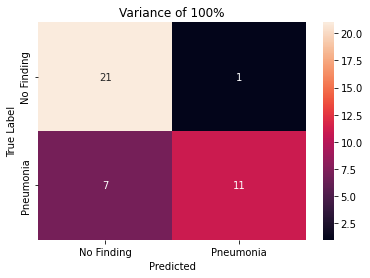

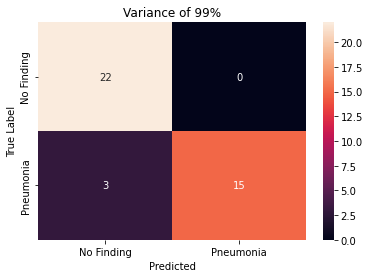

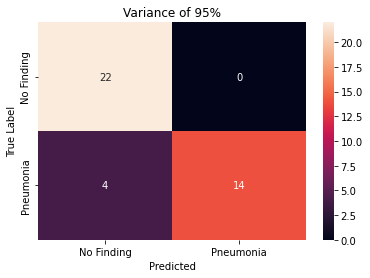

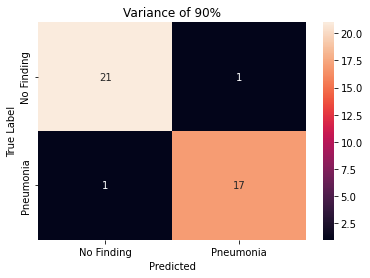

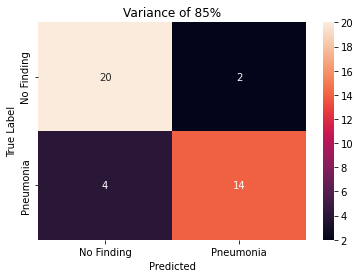

In [18]:
#Display Confusion Matrix
#Credits: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


for conf_idx in range(len(results)):
    conf_matrix = confusion_matrix(test_lbl, results[conf_idx])
    df_cm = pd.DataFrame(
        conf_matrix, index=['No Finding', 'Pneumonia'], columns=['No Finding', 'Pneumonia'], 
    )
    
    heatmap = sns.heatmap(df_cm, annot=True, fmt='d')
    
    plt.title(f"Variance of {variances[conf_idx]}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted")
    plt.show()

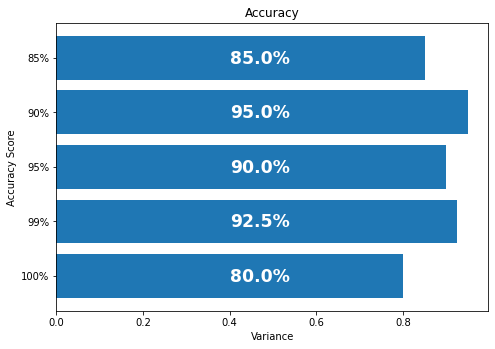

In [19]:
# For Accuracy, Precision, 
accuracies = []
threshold = -0.1

fig = plt.figure()
ax = fig.add_axes([0,1,1,1])

for i in range(len(results)):
    accuracies.append(accuracy_score(test_lbl, results[i]))
    ax.text(0.4, threshold, str((accuracies[i]*100)) + '%', color='white', fontweight='bold', fontsize="xx-large")
    threshold = threshold + 1
    
ax.barh(variances, accuracies)
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Variance')
plt.title("Accuracy")
plt.show()   

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Functions
def getPrecisionScore(result, label, avg = 'binary'):
    return precision_score(test_lbl, result, average=avg, pos_label=label)

def textBarh(starting, variance, fontweight='regular'):
    ax.text(0.4, starting, str(variance) + '%', color='white', fontweight='bold', fontsize="medium")
    
def getRecallScore(result, label, avg = 'binary'):
    return recall_score(test_lbl, result, average=avg, pos_label=label)

def getF1Score(result, label, avg = 'binary'):
    return f1_score(test_lbl, result, average=avg, pos_label=label)

In [21]:
#Function for Classification Report Horizontal Bar Graph.
# Applicable for 2 class only
def barHCustom(title, scoreFunction, results, class_labels):
    
    def textBarh(starting, variance, fontweight='regular'):
        ax.text(0.4, starting, str(round(variance, 2)) + '%', color='white', fontweight='bold', fontsize="medium")
        
    #Get data score of each label
    data = [
        [scoreFunction(r, "No Finding") for r in results],
        [scoreFunction(r, "Pneumonia") for r in results]
    ]
    
    ind = np.arange(5)
    width = 0.4

    fig, ax = plt.subplots()
    ax.barh(ind + 0.20, data[0], width, color='green', label=class_labels[0])
    ax.barh(ind + 0.60, data[1], width, color='red', label=class_labels[1])
    
    starting = 0.1
    for d in data[0]:
        textBarh(starting, d*100)
        starting = starting + 1

    starting = 0.5
    for d in data[1]:
        textBarh(starting, d*100)
        starting = starting + 1  
        
    ax.set(yticks=ind + width, yticklabels=['100%', '99%', '95%', "90%", "85%"], ylim=[2*width - 1, 5], xlim=[0, 1.2])
    ax.legend()
    ax.set_ylabel('Variance')
    ax.set_xlabel('Percent')
    plt.title(title)
    plt.show()

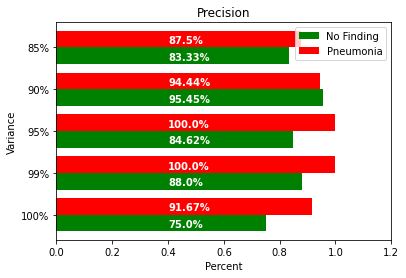

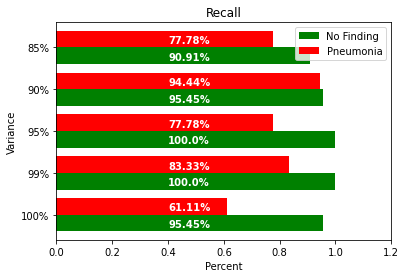

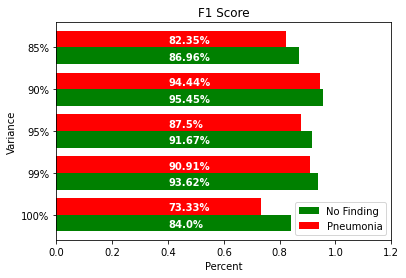

In [22]:
barHCustom("Precision", getPrecisionScore, results, class_labels=["No Finding", "Pneumonia"])
barHCustom("Recall", getRecallScore, results, class_labels=["No Finding", "Pneumonia"])
barHCustom("F1 Score", getF1Score, results, class_labels=["No Finding", "Pneumonia"])